# Multivariate Gaussian

$\mathbf{X}$ is our data, where
$$
\mathbf{X} \sim \mathcal{N}(\mathbf{\mu}, \mathbf{\Sigma} = \mathbf{\Lambda}^{-1})
$$

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_spd_matrix

---
## Parameterizations

Multivariate Gaussian PDF:
$$
p(x\mid\mu,\Sigma) = \frac{1}{(2\pi)^{n/2}{\vert\Sigma\vert}^{1/2} } {e}^{-\frac{1}{2}{(x - \mu)}^\top {\Sigma}^{-1} (x - \mu)}, x \in \mathbb{R}^d
$$

Moment Parameterization:
$$
\begin{aligned}
    \mu &= E(x) \\
    \Sigma &= E(x - \mu){(x - \mu)}^\top
\end{aligned}
$$

Canonical Parameterization:
$$
\begin{aligned}
    \Lambda &= \Sigma^{-1}\,\text{Precision Matrix = Inverse Covariance Matrix} \\
    \eta &= \Sigma^{-1}\mu
\end{aligned}
$$

$$
p(x\mid \eta, \Lambda) = {e}^{a + \eta^\top x - \frac{1}{2} x^\top \Lambda x} , a = -\frac{1}{2} (n log(2\pi) - log\vert\Lambda\vert + \eta^\top \Lambda \eta)
$$

Converting Canonical Parameters to Moment Parameters:
$$
\begin{aligned}
\mu &= \Lambda^{-1}\eta \\
\Sigma &= \Lambda^{-1}
\end{aligned}
$$

---
## MLE estimates

We are given a dataset $\mathcal{D} = \{\mathbf{x}_1, \mathbf{x}_2, \ldots, \mathbf{x}_n\}$, where $\mathbf{x}_i \in \mathbb{R}^d$ sampled from a multivariate gaussian and each sample is sampled i.i.d.

Goal: 
$$
\begin{aligned}
    \hat{\theta}_{MLE} &= \operatorname*{argmax}_{\theta} \,P(\mathcal{D}; \theta = \mu, \Sigma) \\
    &= \operatorname*{argmax}_{\theta} \,P(X_1=\mathbf{x}_1,\ldots,X_n=\mathbf{x}_n; \theta = \mu, \Sigma) \\
    &= \operatorname*{argmax}_{\theta} \,\prod_{i=1}^n P(X_i=\mathbf{x};\theta = \mu, \Sigma) \because \text{ Each sample is i.i.d. } \\
    &= \operatorname*{argmax}_{\theta} \,\prod_{i=1}^n  \frac{1}{(2\pi)^{n/2}{\vert\Sigma\vert}^{1/2} } {e}^{-\frac{1}{2}{(\mathbf{x}_i - \mu)}^\top {\Sigma}^{-1} (\mathbf{x}_i - \mu)} \\
    &= \operatorname*{argmax}_{\theta} \,\sum_{i=1}^n  log(\frac{1}{(2\pi)^{n/2}{\vert\Sigma\vert}^{1/2} })\,-\frac{1}{2}\sum_{i=1}^n { {(\mathbf{x}_i - \mu)}^\top {\Sigma}^{-1} (\mathbf{x}_i - \mu)} \because \text{ Logarithms are strictly increasing } \\
    &= \operatorname*{argmax}_{\theta} \,-\frac{n}{2}\sum_{i=1}^n  log(2\pi)\,-\frac{1}{2}\sum_{i=1}^n log({\vert\Sigma\vert})\,-\frac{1}{2}\sum_{i=1}^n { {(\mathbf{x}_i - \mu)}^\top {\Sigma}^{-1} (\mathbf{x}_i - \mu)} \\
    &= \operatorname*{argmax}_{\theta} \,-\frac{n^2}{2}log(2\pi)\,-\frac{n}{2}log({\vert\Sigma\vert})\,-\frac{1}{2}\sum_{i=1}^n { {(\mathbf{x}_i - \mu)}^\top {\Sigma}^{-1} (\mathbf{x}_i - \mu)} \\
    &= \operatorname*{argmax}_{\theta} \,\frac{n}{2}log({\vert\Sigma^{-1}\vert})\,-\frac{1}{2}\sum_{i=1}^n tr\big[{ {(\mathbf{x}_i - \mu)}^\top {\Sigma}^{-1} (\mathbf{x}_i - \mu)} \big]
\end{aligned}
$$

$\hat{\mu}_{MLE}$:
$$
\begin{aligned}
    \frac{\partial}{\partial\mu}\,\frac{n}{2}log({\vert\Sigma^{-1}\vert})\,-\frac{1}{2}\sum_{i=1}^n tr\big[{ {(\mathbf{x}_i - \mu)}^\top {\Sigma}^{-1} (\mathbf{x}_i - \mu)} \big] &= 0 \\
    -\frac{1}{2}\sum_{i=1}^n \frac{\partial}{\partial\mu} tr\big[{ {(\mathbf{x}_i - \mu)}^\top {\Sigma}^{-1} (\mathbf{x}_i - \mu)} \big] &= 0 \\
    \sum_{i=1}^n \frac{\partial}{\partial\mu} tr\big[{ {(\mathbf{x}_i - \mu)(\mathbf{x}_i - \mu)}^\top {\Sigma}^{-1} } \big] &= 0 \because \mathbf{x}^\top A\mathbf{x} = tr(\mathbf{x}^\top A\mathbf{x}) = tr(\mathbf{x}\mathbf{x}^\top A) = tr(A\mathbf{x}\mathbf{x}^\top) \\
    \sum_{i=1}^n { {\Sigma}^{-1}(\mathbf{x}_i - \mu)} &= 0 \because 
\frac{\partial}{\partial s}(\mathbf{x}-\mathbf{s})^\top W (\mathbf{x}-\mathbf{s}) = -2W(\mathbf{x}-\mathbf{s}) \text{ when } W \text{ is symmetric} \\
    \sum_{i=1}^n \mathbf{x}_i &= \sum_{i=1}^n \mu \\
    \hat{\mu}_{MLE} &= \frac{1}{n} \sum_{i=1}^n \mathbf{x}_i
\end{aligned}
$$

$\hat{\Sigma}_{MLE}$:
$$
\begin{aligned}
    \frac{\partial}{\partial\Sigma^{-1} }\,\frac{n}{2}log({\vert\Sigma^{-1}\vert})\,-\frac{1}{2}\sum_{i=1}^n tr\big[{ {(\mathbf{x}_i - \mu)}^\top {\Sigma}^{-1} (\mathbf{x}_i - \mu)} \big] &= 0 \\
    \frac{n}{2}\frac{\partial}{\partial\Sigma^{-1} }\,log({\vert\Sigma^{-1}\vert})\,-\frac{1}{2}\sum_{i=1}^n \frac{\partial}{\partial\Sigma^{-1} }\, tr\big[{ {(\mathbf{x}_i - \mu)}^\top {\Sigma}^{-1} (\mathbf{x}_i - \mu)} \big] &= 0 \\
    \frac{n}{2}\Sigma\,-\frac{1}{2}\sum_{i=1}^n \frac{\partial}{\partial\Sigma^{-1} }\, tr\big[{ {(\mathbf{x}_i - \mu)}^\top {\Sigma}^{-1} (\mathbf{x}_i - \mu)} \big] &= 0 \because \frac{\partial log\vert A \vert}{\partial A} = A^{-T} \text{ and covariance matrix is assumed symmetric } \\
    \frac{n}{2}\Sigma\,-\frac{1}{2}\sum_{i=1}^n (\mathbf{x}_i - \mu){(\mathbf{x}_i - \mu)}^\top &= 0 \because \frac{\partial \mathbf{a}^\top X \mathbf{b} }{\partial X} = \mathbf{a} \mathbf{b}^\top \\
    \hat{\Sigma}_{MLE} &= \frac{1}{n}\sum_{i=1}^n (\mathbf{x}_i - \mu){(\mathbf{x}_i - \mu)}^\top &= 0
\end{aligned}
$$

---
## Covariance Matrices

$$
{\large\Sigma}=
\begin{pmatrix}
{\operatorname{var}(\mathbf{X_0})}
&{\operatorname{cov}(\mathbf{X_0,X_1})}
&{\operatorname{cov}(\mathbf{X_0,X_2})}\\
{\operatorname{cov}(\mathbf{X_1,X_0})}
&{\operatorname{var}(\mathbf{X_1})}
&{\operatorname{cov}(\mathbf{X_1,X_2})}\\
{\operatorname{cov}(\mathbf{X_2})}
&{\operatorname{cov}(\mathbf{X_2,X_1})}
&{\operatorname{var}(\mathbf{X_2})}\\
\end{pmatrix}$$

- Real symmetric, $\therefore$ Hermitian
- Positive Semi-definite
- We can use Cholesky decomposition to break down the matrix into a lower triangular matrix and its transpose or upper triangular matrix with its transpose, and then find the inverse of the covariance matrix, which is also called the precision matrix

$$
\begin{aligned}
\mathbf{\Sigma} &= \mathbf{L L^\top} = \mathbf{U^\top U} \\
\mathbf{\Sigma^{-1} } &= \mathbf{ {({L}^{-1})}^\top ({L}^{-1})} = \mathbf{({U}^{-1}) {({U}^{-1})}^\top} \\
&= \mathbf{\Lambda}\,(\text{Precision Matrix})
\end{aligned}
$$

### Precision Matrices
- The key property of the precision matrix is that its zeros tell you about conditional independence. Specifically: $\mathbf{\Lambda}_{ij} = 0$ if and only if $X_i$ and $X_j$ are conditionally independent given all other coordinates of $X$ 
$$P(X_i, X_j \mid X_1,\ldots,X_n) = P(X_i\mid X_1,\ldots,X_n)P(X_j\mid X_1,\ldots,X_n)$$

- It may help to compare and contrast this with the analogous property of the covariance matrix: $\mathbf{\Sigma}_{ij} = 0$ if and only if $X_i$ and $X_j$ are independent 

$$P(X_i, X_j) = P(X_i)P(X_j)$$

- That is, whereas zeros of the covariance matrix tell you about independence, zeros of the precision matrix tell you about **conditional** independence.

### Clarifying Terms

#### Conjugate Transpose
E.g. Suppose we want to calculate the conjugate transpose of the following matrix $A$:
$$
\boldsymbol{A} = \begin{bmatrix} 1 & -2 - i & 5 \\ 1 + i & i & 4-2i \end{bmatrix}
$$

We first transpose the matrix:
$$
\boldsymbol{A}^\mathrm{T} = \begin{bmatrix} 1 & 1 + i \\ -2 - i & i \\ 5 & 4-2i\end{bmatrix}
$$

Then we conjugate every entry of the matrix:
$$
\boldsymbol{A}^\mathrm{H} = \begin{bmatrix} 1 & 1 - i \\ -2 + i & -i \\ 5 & 4+2i\end{bmatrix}
$$

#### Hermitian Matrix

$$
\begin{bmatrix}
  2     & 2 + i & 4 \\
  2 - i & 3     & i \\
  4     &   - i & 1 \\
\end{bmatrix}
\underset{conjugate}{\rightarrow}
\begin{bmatrix}
  2     & 2 - i & 4 \\
  2 + i & 3     & -i \\
  4     &   i & 1 \\
\end{bmatrix}
\underset{transpose}{\rightarrow}
\begin{bmatrix}
  2     & 2 + i & 4 \\
  2 - i & 3     & i \\
  4     &   - i & 1 \\
\end{bmatrix}
$$

$$A = A^{H} (\text{Conjugate Transpose})$$
- The complex extension of real symmetric matrices $(A = A^\top , a_{ij} = a_{ji} \in \mathbb{R})$

#### Positive Semi-definiteness

A $n \times n$ symmetric real matrix $M$ is said to be `positive semidefinite` or `non-negative definite` if $x^\textsf{T} Mx \geq 0$ for all non-zero $x$ in $\mathbb{R}^n$.

$$
M \text{ positive semi-definite} \quad \iff \quad x^\textsf{T} Mx \geq 0 \text{ for all } x \in \mathbb{R}^n \setminus \mathbf{0}
$$

A $n \times n$ Hermitian complex matrix $M$ is said to be `positive semi-definite` or `non-negative definite` if $x^* Mx \geq 0$ for all non-zero $x$ in $\mathbb{C}^n$.

$$
M \text{ positive semi-definite} \quad \iff \quad x^* Mx \geq 0 \text{ for all } x \in \mathbb{C}^n \setminus \mathbf{0}
$$

#### Cholesky Decomposition
- Decomposes a Hermitian, Positive semi-definite matrix into a product of a lower triangular matrix and its conjugate transpose

$$
\mathbf{A} = \mathbf{L L}^*
$$

- where $\mathbf{L}$ is a lower triangular matrix with real and positive diagonal entries, and $\mathbf{L*}$ denotes the conjugate transpose of L. Every Hermitian positive-definite matrix (and thus also every real-valued symmetric positive-definite matrix) has a unique Cholesky decomposition.

- If the matrix $\mathbf{A}$ is Hermitian and positive semi-definite, then it still has a decomposition of the form $\mathbf{A} = \mathbf{L L}^*$ if the diagonal entries of $\mathbf{L}$ are allowed to be zero.

- When $\mathbf{A}$ has only real entries, $\mathbf{L}$ has only real entries as well, and the factorization may be written $\mathbf{A} = \mathbf{L L}^\top$.

- If $\mathbf{A}$ is positive definite:
    - The Cholesky decomposition is unique when $\mathbf{A}$ is positive definite; there is only one lower triangular matrix $\mathbf{L}$ with strictly positive diagonal entries such that $\mathbf{A} = \mathbf{L L}^*$. However, the decomposition need not be unique when $\mathbf{A}$ is positive semidefinite.

    - The converse holds trivially: if $\mathbf{A}$ can be written as $\mathbf{L L}^*$ for some invertible $\mathbf{L}$, lower triangular or otherwise, then $\mathbf{A}$ is Hermitian and positive definite.

### Normal Markov Chain

Consider a Markov chain $X_1, X_2, X_3, \ldots$ where the transitions are given by $X_{t+1} \mid X_{t} \sim \mathcal{N}(X_t,1)$. You might think of this Markov chain as corresponding to a type of "random walk": given the current state, the next state is obtained by adding a random normal with mean $0$ and variance $1$.

The following code simulates a realization of this Markov chain, starting from an initial state $X_1 \sim \mathcal{N}(0,1)$, and plots it.

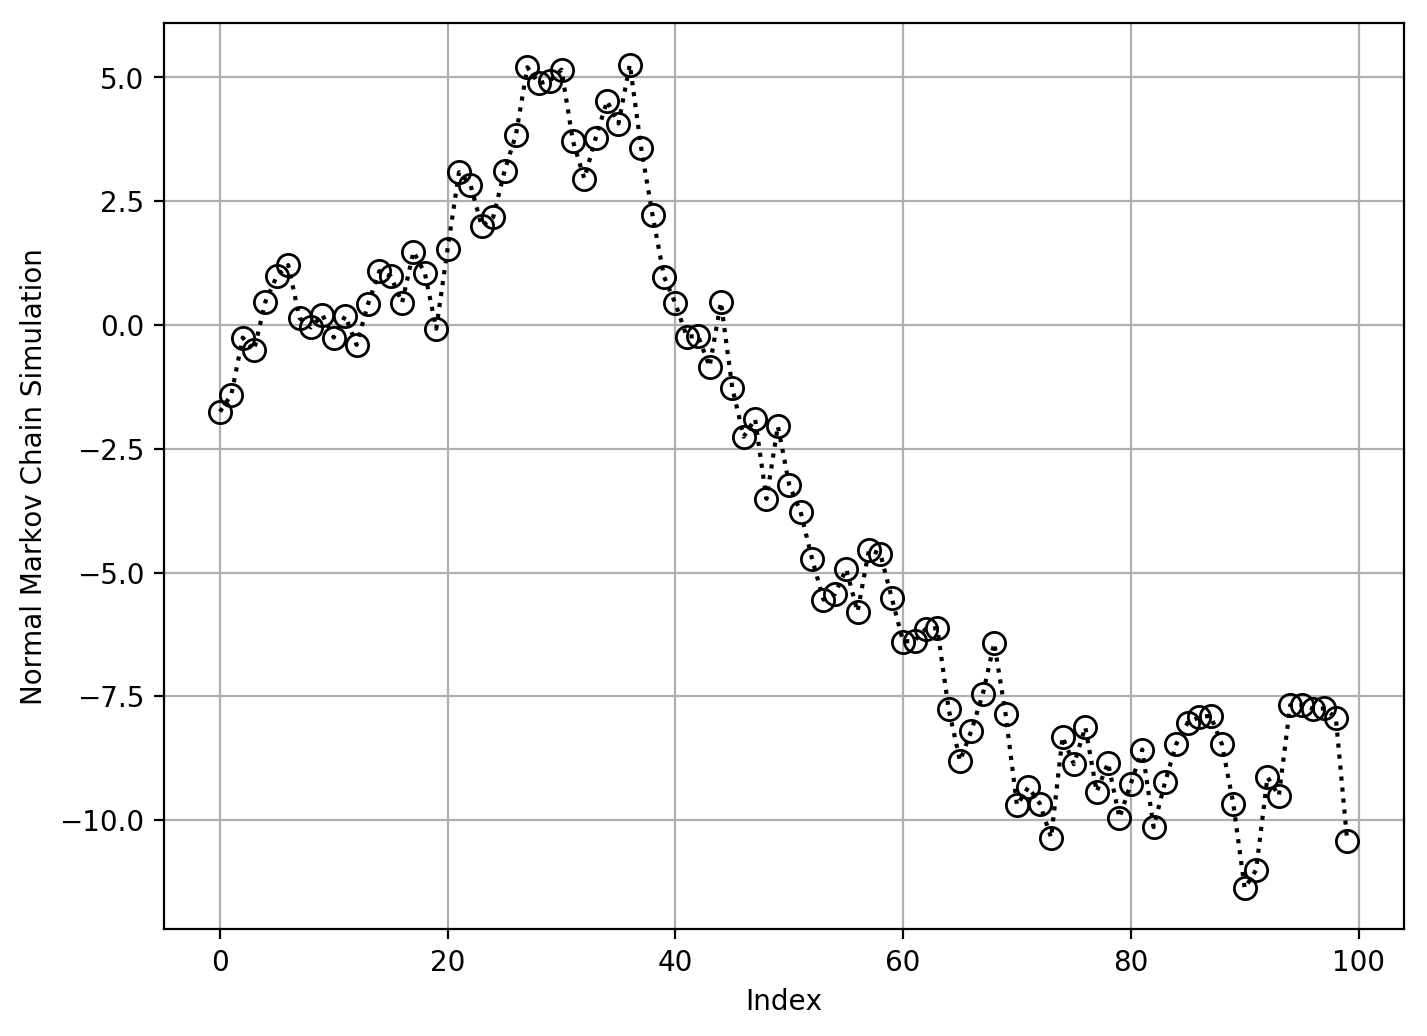

In [37]:
np.random.seed(100)
x_t = 0
X = []
for i in range(100):
    x_t = np.random.normal(x_t, 1)
    X.append(x_t)
    
plt.figure(figsize=(8, 6), dpi=200)
plt.plot(X, 
         fillstyle='none', 
         **dict(color='black', 
                linestyle=':', 
                marker='o',
                markersize=8))
plt.xlabel('Index')
plt.ylabel('Normal Markov Chain Simulation')
plt.grid();

### Creating a Linear Regression Dataset

In [5]:
# Make a sample 5 dimensional covariance matrix
covariance_matrix = make_spd_matrix(n_dim=5, random_state=42)
covariance_matrix

array([[ 0.97766615, -0.23316137, -1.21865345, -0.39562   ,  0.92189636],
       [-0.23316137,  0.64354244,  1.047413  ,  0.38781049, -0.53749089],
       [-1.21865345,  1.047413  ,  2.97417899,  1.05308457, -1.61639237],
       [-0.39562   ,  0.38781049,  1.05308457,  0.90057916, -0.78071011],
       [ 0.92189636, -0.53749089, -1.61639237, -0.78071011,  1.64198243]])

In [8]:
# Get the cholesky decomposition 
L = np.linalg.cholesky(covariance_matrix)

In [13]:
# Get the precision matrix
precision_matrix = np.dot(np.linalg.inv(L), np.linalg.inv(L.transpose()))
precision_matrix

array([[ 1.02284405,  0.31456152,  1.37001189, -0.09807947, -1.04906827],
       [ 0.31456152,  1.79760353, -1.99908273, -0.05096202,  0.37923192],
       [ 1.37001189, -1.99908273,  7.35825964, -0.85555487, -2.49064347],
       [-0.09807947, -0.05096202, -0.85555487,  2.187769  ,  0.97090646],
       [-1.04906827,  0.37923192, -2.49064347,  0.97090646,  3.76302031]])

---
## Resources:

### MLE for Multivariate Gaussian
- [Quick run through of MLE estimates for Multivariate Gaussian](https://stats.stackexchange.com/questions/351549/maximum-likelihood-estimators-multivariate-gaussian)
- [Princeton MVN MLE notes](https://www.cs.princeton.edu/~bee/courses/scribe/lec_09_09_2013.pdf)
- [Multivariate Gaussian Parameterizations and MLE from Prof. Michael Jordan of Berkeley](https://people.eecs.berkeley.edu/~jordan/courses/260-spring10/other-readings/chapter13.pdf)
- [Stat 260/CS 294 Bayesian Modeling and Inference lecture notes](https://people.eecs.berkeley.edu/~jordan/courses/260-spring10/lectures/index.html)
- [The Matrix Cookbook](https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf)

### Covariance Matrix
- [Precision Matrix and Markov Chain](https://stephens999.github.io/fiveMinuteStats/normal_markov_chain.html)
- [How to draw Error Ellipse representing Covariance matrix](http://www.visiondummy.com/2014/04/draw-error-ellipse-representing-covariance-matrix/)
- [Why is the shape of the isocontour of a 2D multivariate gaussian an ellipse?](http://cs229.stanford.edu/section/gaussians.pdf)
- [Linear Algebra review for Change of Basis and Ellipses](http://i-systems.github.io/HSE545/machine%20learning%20all/10%20Gaussian/01_Gaussian_python.pdf)
- [Transpose Matrices recap](http://www.katjaas.nl/transpose/transpose.html)
- [Eigenbasis and Decomposition](https://intuitive-math.club/linear-algebra/eigenbasis)
- [Orthonormal Bases](https://www.khanacademy.org/math/linear-algebra/alternate-bases/orthonormal-basis/v/linear-algebra-introduction-to-orthonormal-bases)
- [Why the Chi-squared distribution is the sum of squares of k independent standard normal random variables](http://www.dataanalysisclassroom.com/lesson53/)
- [Relationship between Correlation / Covariance and Dot Product (Inner Product)](https://brenocon.com/blog/2012/03/cosine-similarity-pearson-correlation-and-ols-coefficients/)